# First simple web-map with Folium


**Date**: 22.04.2023

**Course**: Methods of Spatial Analysis. Advanced Level. // HSE, Moscow, spring 2023

## 1. Import libraries

In [453]:
EPSG_CODE = 32640

In [455]:
import pandas as pd
import geopandas as gpd
import folium

from shapely import geometry


## 2.Read data from a geojson file

In [474]:
data_monuments_pts = gpd.read_file('./ufa_okn_monuments_pts.geojson').to_crs(f"EPSG:{EPSG_CODE}")
bounds_poly = gpd.read_file('./bounds.geojson').to_crs(f"EPSG:{EPSG_CODE}")
data_okn_poly = gpd.read_file('./ufa_okn_ply.geojson').to_crs(f"EPSG:{EPSG_CODE}")
data_okn_pts = gpd.read_file('./ufa_okn_pts.geojson').to_crs(f"EPSG:{EPSG_CODE}")

In [319]:
data_monuments_pts.head()

,fid,field_1,Объект,address,polygon,lat,lon,Номер в реестре,название улицы,Комментарий,...,год постановки ОКН на Госохрану,fid_3,fid_2,Объект_2,address_2,Вид объекта_2,дата создания_2,layer,path,geometry
0,1,503,Некрополь на Сергиевском кладбище,"Республика Башкортостан, г. Уфа, Кировский ра...",False,54.707582,55.987347,21711057040005,NA,NA,...,1955,NaN,NaN,NaN,NaN,NaN,NaN,Extracted park,"Point?crs=EPSG:32640&field=fid:long(0,0)&field...",POINT (434752.949 6062722.869)
1,2,415,Парк им. В.И.Ленина,"Республика Башкортостан, г. Уфа, Кировский рай...",False,54.718160,55.943241,21620508620005,NA,NA,...,1989,NaN,NaN,NaN,NaN,NaN,NaN,Extracted park,"Point?crs=EPSG:32640&field=fid:long(0,0)&field...",POINT (431928.947 6063941.748)
2,3,418,Парк им. И.Якутова,"Республика Башкортостан, г. Уфа, Советский рай...",False,54.740485,55.950985,21620508690005,NA,NA,...,1989,NaN,NaN,NaN,NaN,NaN,NaN,Extracted park,"Point?crs=EPSG:32640&field=fid:long(0,0)&field...",POINT (432464.893 6066418.318)
3,4,413,Парк Победы,"Республика Башкортостан, г. Уфа, Орджоникидзев...",False,54.822570,56.059130,21620508600005,NA,NA,...,1989,NaN,NaN,NaN,NaN,NaN,NaN,Extracted park,"Point?crs=EPSG:32640&field=fid:long(0,0)&field...",POINT (439549.541 6075453.185)
4,5,555,Сад им. Крупской,"Республика Башкортостан, г. Уфа, Кировский рай...",False,54.711750,55.951670,21721048080005,NA,NA,...,1989,NaN,NaN,NaN,NaN,NaN,NaN,Extracted park,"Point?crs=EPSG:32640&field=fid:long(0,0)&field...",POINT (432461.227 6063220.380)


In [320]:
data_okn_poly.head()

,fid,Объект,address,lat,lon,дата создания,geometry
0,208,Дворец спорта,"Республика Башкортостан, г. Уфа, Октябрьский р...",54.76029,55.99415,1967 г.,"MULTIPOLYGON (((435252.373 6068566.996, 435288..."
1,281,Ряды торговые,"Республика Башкортостан, г. Уфа, Кировский рай...",54.72479,55.94413,1864 г.,"MULTIPOLYGON (((431920.900 6064625.686, 431965..."
2,305,Дворец культуры завода резиново-технических из...,"Республика Башкортостан, г. Уфа, Советский рай...",54.75175,55.99620,1972 г.,"MULTIPOLYGON (((435370.538 6067618.890, 435377..."
3,654,Дом торговый,"Республика Башкортостан, г. Уфа, ул. Ленина, д...",54.72486,55.94646,1910-е гг.,"MULTIPOLYGON (((432109.884 6064669.207, 432122..."
4,658,Дом торговый,"Республика Башкортостан, г. Уфа, ул. Ленина, 5",54.72408,55.94613,1916 г.,"MULTIPOLYGON (((432110.028 6064587.427, 432119..."


In [321]:
data_okn_pts.head()

,fid,field_1,Объект,address,polygon,lat,lon,Номер в реестре,название улицы,Комментарий,...,дата создания,Id - идентификатор,год постановки ОКН на Госохрану,fid_3,fid_2,Объект_2,address_2,Вид объекта_2,дата создания_2,geometry
0,1,565.0,"Ансамбль исторической застройки """"Архив Присут...","Республика Башкортостан, г. Уфа, ул. К.Маркса, 4",True,54.72030,55.93899,2.181136e+13,NA,NA,...,I половина - конец XIX века,318335.0,2018,3889.0,1.0,"Ансамбль исторической застройки """"Архив Присут...","Республика Башкортостан, г. Уфа, ул. К.Маркса, 4",Памятник,I половина - конец XIX века,POINT (431658.729 6064183.992)
1,2,594.0,Ансамбль усадьбы Першиных,"Башкортостан Респ, Уфа г, Коммунистическая ул,...",True,54.71869,55.96426,2.192136e+13,NA,NA,...,1890-1910-е годы,320094.0,2018,20976.0,292.0,Ансамбль усадьбы Першиных,"Башкортостан Респ, Уфа г, Коммунистическая ул,...",NaN,NaN,POINT (433283.705 6063980.536)
2,3,635.0,Ансамбль усадьбы Першиных: главный дом,"Башкортостан Респ, Уфа г, Коммунистическая ул,...",True,54.71886,55.96498,2.201136e+13,NA,NA,...,первая половина XIX века,320989.0,2018,5351.0,3.0,Ансамбль усадьбы Першиных: главный дом,"Башкортостан Респ, Уфа г, Коммунистическая ул,...",Памятник,первая половина XIX века,POINT (433330.361 6063998.767)
3,4,47.0,Банк Государственный,"Республика Башкортостан, город Уфа, улица Теат...",True,54.72080,55.94076,2.141005e+13,NA,NA,...,кон. XIX в.,152973.0,1988,4252.0,4.0,Банк Государственный,"Республика Башкортостан, город Уфа, улица Теат...",Памятник,кон. XIX в.,POINT (431773.573 6064237.903)
4,10,87.0,Бывший особняк лесопромышленника Чижова,"Республика Башкортостан, г. Уфа, ул. Октябрьск...",True,54.72342,55.95065,2.141005e+13,NA,NA,...,1889 г.,153734.0,1976,10727.0,10.0,Бывший особняк лесопромышленника Чижова,"Республика Башкортостан, г. Уфа, ул. Октябрьск...",Памятник,1889 г.,POINT (432414.931 6064519.855)


## 2.Create Grid (fishnet)
* function create_grid return fishnet as GeoataFrame. It is possible to pass squares size

In [323]:
def create_grid(data, square_size = 500, right_crs = "EPSG:32640"):
    #extent
    total_bounds = data.total_bounds
    minX, minY, maxX, maxY = total_bounds
    
    #reproject
    data = data.to_crs(right_crs)
    
    #fishnet
    grid_cells = []
    x, y = (minX, minY)
    geom_array = []

    while y <= maxY:
            while x <= maxX:
                geom = geometry.Polygon([(x,y), 
                                         (x, y+square_size), 
                                         (x+square_size, y+square_size), 
                                         (x+square_size, y), (x, y)])
                geom_array.append(geom)
                x += square_size
            x = minX
            y += square_size


    fishnet = gpd.GeoDataFrame(geom_array, columns=['geometry']).set_crs('EPSG:32640')
    fishnet['id'] = fishnet.index
    
    return fishnet

#### 2.1 Create fishnet

In [457]:
fishnet = create_grid(data_okn_pts, 400)
fishnet.to_file('grid.gpkg')

## 3. Count Points in Polygon

#### 3.1. Merge fishnet and your points data to count them in polygons

In [462]:
def count_points(grid, data, right_crs = "EPSG:32640"):
    #reproject
    data = data.to_crs(right_crs)
    grid = grid.to_crs(right_crs)
    
    #merge
    merged = gpd.sjoin(data, grid, how='left', predicate='within')
    merged['n'] = 1
    dissolve = merged.dissolve(by="index_right", aggfunc="count")
    grid.loc[dissolve.index, 'n'] = dissolve.n.values
    
    return grid

In [463]:
fishnet = count_points(fishnet, data_okn_pts)

#### drop NA values in order to show borders of cells with values only


In [464]:
fishnet = fishnet.dropna()

#### 3.2. Plot the result

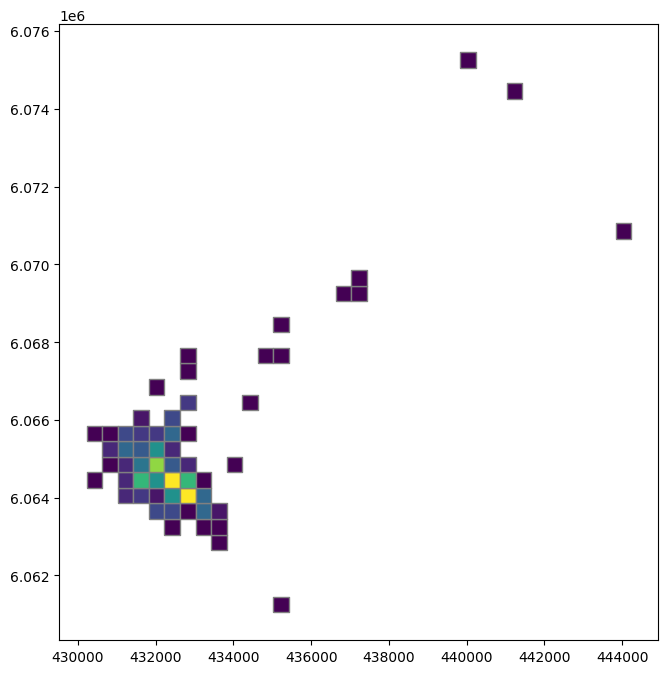

In [466]:
ax = fishnet.plot(column='n', figsize=(12, 8), cmap='viridis', k=3, edgecolor="grey")
#scheme='natural_breaks'

## 4 Create Web-map

#### 4.1 Util functions
some functions for adding layers and plugins

In [437]:
def add_grid(m, data, legend_name, name, fill_color='YlGn', fill_opacity = 0.7):
    folium.Choropleth(
    geo_data=data,
    data=fishnet,
    columns=['id', 'n'],
    fill_color=fill_color,
    fill_opacity = fill_opacity,
    key_on='id',
    nan_fill_opacity=0,
    line_color = "#dddddd",
    legend_name=legend_name,
    name=name,
    ).add_to(m)

In [449]:
def add_vector_layer(m, data, name, popup = None, tooltip = None, 
                      highlight_function = None, 
                     marker = None, show = True, **kwargs):
    folium.GeoJson(
        data,
        name=name,
        tooltip=tooltip,
        popup=popup,
        style_function=lambda x: kwargs,
        highlight_function=highlight_function,
        marker = marker,
        zoom_on_click=True,
        show=show
    ).add_to(m)

In [421]:
def add_point_cluster(m, name, data, control = False, marker = None):
    marker_cluster = MarkerCluster(name=name, control = control)
    mc1= folium.plugins.FeatureGroupSubGroup(marker_cluster, name)
    m.add_child(marker_cluster)
    m.add_child(mc1)
    mc1.add_child(folium.GeoJson(data.to_json(), marker = marker, embed=False, show=False))

In [422]:
def add_widget(m, plugin_class, **kwargs):
    plugin_class(**kwargs).add_to(m)

Creating folium.Map instance and applying functions in one cell

In [469]:
#reproject
data_okn_pts = data_okn_pts.to_crs('EPSG:4326')

#create instance of folium.Map
m = folium.Map(location=[data_okn_pts.centroid.y.mean(), 
                         data_okn_pts.centroid.x.mean()], 
               zoom_start=12,  
               tiles="cartodb positron", control_scale=True)

#apply functions
add_vector_layer(m, bounds_poly, "Границы города",
                  fillOpacity = 0,
                  color = "#000000",
                  weight = 2)

add_grid(m, fishnet, "Количество ОКН", "Количество ОКН", fill_opacity = 0.7)
add_vector_layer(m, data_monuments_pts, "Могилы, памятники, парки",
                marker=folium.Marker(icon=folium.Icon(color = "green", icon = "monument", prefix = "fa")), 
                 show = False)

add_vector_layer(m, data_okn_poly, "ОКН - Полигоны",
                  tooltip=folium.GeoJsonTooltip(fields=["Объект"]),
                  popup=folium.GeoJsonPopup(fields=['Объект']),
                  highlight_function = lambda x:{
                    "fillColor": "#ffff00",
                    "fillOpacity": 0.8},
                  fillColor = "#999999", 
                  color = "#888888", 
                  weight = 0.5)


add_point_cluster(m, "ОКН - Точки", data_okn_pts, 
                  marker = folium.Marker(icon=folium.Icon(color = "red", icon = "landmark", prefix = "fa"))
                 )
add_widget(m, Fullscreen, position = "bottomright", title = "Expand me", title_cancel = "Exit me",
                          force_separate_button = True)
add_widget(m, MousePosition)
add_widget(m, folium.LayerControl)

m

/tmp/ipykernel_40133/2966046529.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[data_okn_pts.centroid.y.mean(),
/tmp/ipykernel_40133/2966046529.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_okn_pts.centroid.x.mean()],


Export HTML

In [470]:
m.save("./index.html")